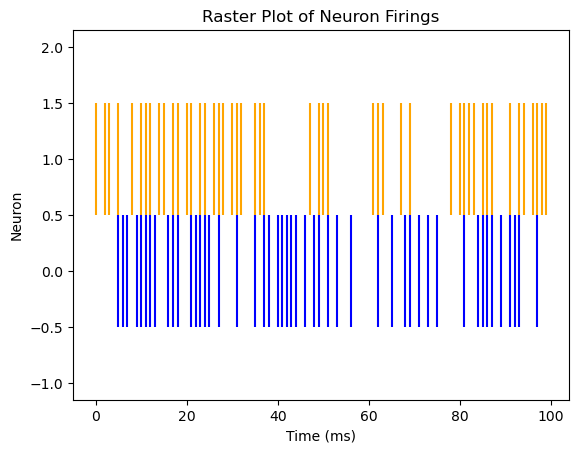

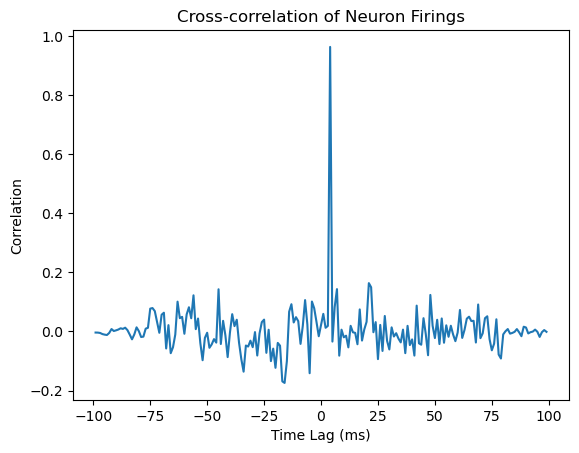

Time lag between neurons: 4 ms


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_neurons(timesteps, firing_time1, firing_time2, noise_level=0.1):
    neuron1 = np.zeros(timesteps)
    neuron2 = np.zeros(timesteps)

    # Simulate neuron firings
    neuron1[firing_time1] = 1
    neuron2[firing_time2] = 1

    # Add noise to the neurons
    neuron1 += noise_level * np.random.normal(size=timesteps)
    neuron2 += noise_level * np.random.normal(size=timesteps)

    return neuron1, neuron2

def cross_correlation(neuron1, neuron2):
    return np.correlate(neuron1, neuron2, mode='full')

def plot_cross_correlation(ccorr, time_lag):
    plt.plot(time_lag, ccorr)
    plt.title('Cross-correlation of Neuron Firings')
    plt.xlabel('Time Lag (ms)')
    plt.ylabel('Correlation')

    # Find the index of the maximum correlation
    max_index = np.argmax(ccorr)
    lag = time_lag[max_index]

    plt.show()
    print(f'Time lag between neurons: {lag} ms')


def raster_plot(neuron1, neuron2):
    plt.eventplot([np.where(neuron1 > 0)[0], np.where(neuron2 > 0)[0]], colors=['blue', 'orange'])
    plt.title('Raster Plot of Neuron Firings')
    plt.xlabel('Time (ms)')
    plt.ylabel('Neuron')
    plt.show()

def main():
    # Simulation parameters
    timesteps = 100  # Adjust as needed
    firing_time1 = 24 #
    firing_time2 = 20 # 4ms lag 
    noise_level = 0.05  # Adjust the noise level

    # Simulate neuron firings with noise
    neuron1, neuron2 = simulate_neurons(timesteps, firing_time1, firing_time2, noise_level)

    # Plot raster plot
    raster_plot(neuron1, neuron2)

    # Calculate cross-correlation
    ccorr = cross_correlation(neuron1, neuron2)

    # Create time lag axis
    time_lag = np.arange(-timesteps + 1, timesteps)

    # Plot cross-correlation
    plot_cross_correlation(ccorr, time_lag)

main()


# We can see in this example that there is a strong lag of 4ms between these two neurons which is how the simulation is designed! Lag plots can be helpful when looking at networks. You can compare populations of neurons firing in order to see if one neuron population is driving the firing of another populuation or not